In [2]:
rm(list=ls())
library(ggplot2)
library(dplyr)
library(lubridate)
library(reshape2)
library(ggplot2)

In [3]:
phone_steps=read.table("parsed_HealthKitData.Steps.Phone.txt",header=TRUE,sep='\t')
phone_steps$Date=as.Date(phone_steps$Date)
length(unique(phone_steps$Subject))

[1] 1325

In [4]:
phone_distance=read.table("parsed_HealthKitData.Distance.Phone.txt",header=TRUE,sep='\t')
phone_distance$Date=as.Date(phone_distance$Date)
length(unique(phone_distance$Subject))

[1] 1318

In [6]:
phone_steps_2019=phone_steps[(phone_steps$Date>=as.Date('2019-01-01')) & (phone_steps$Date<as.Date('2019-07-01')),]
phone_steps_2020=phone_steps[(phone_steps$Date>=as.Date('2020-01-01')) & (phone_steps$Date<as.Date('2020-07-01')),]
print(length(unique(phone_steps_2019$Subject)))
print(length(unique(phone_steps_2020$Subject)))


[1] 234
[1] 1063


In [7]:
phone_distance_2019=phone_distance[(phone_distance$Date>=as.Date('2019-01-01')) & (phone_distance$Date<as.Date('2019-07-01')),]
phone_distance_2020=phone_distance[(phone_distance$Date>=as.Date('2020-01-01')) & (phone_distance$Date<as.Date('2020-07-01')),]
print(length(unique(phone_distance_2019$Subject)))
print(length(unique(phone_distance_2020$Subject)))


[1] 240
[1] 1052


Using Date as id variables



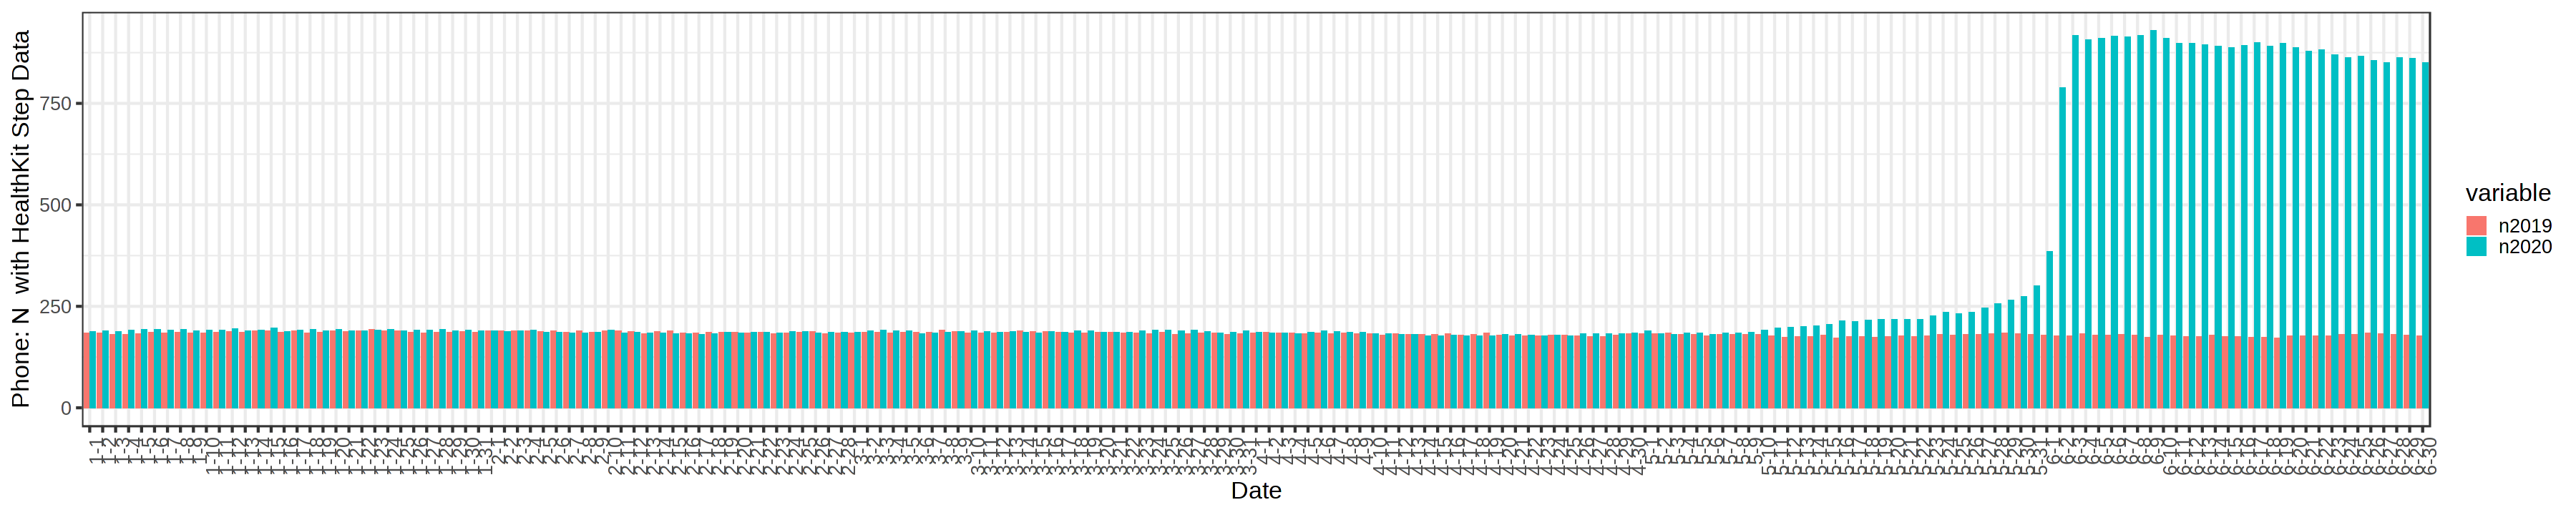

In [8]:
phone_subjects_steps_2019=phone_steps_2019 %>% group_by(Date) %>% summarize(n=n())
phone_subjects_steps_2020=phone_steps_2020 %>% group_by(Date) %>% summarize(n=n())
phone_subjects_steps_2020$Date=phone_subjects_steps_2020$Date-years(1)
phone_nmerged=merge(phone_subjects_steps_2019,phone_subjects_steps_2020,by='Date')
phone_nmerged$month=month(phone_nmerged$Date)
phone_nmerged$day=day(phone_nmerged$Date)

phone_nmerged$Date <- do.call(paste, c(phone_nmerged[c("month","day")], sep="-"))
colnames(phone_nmerged)=c("Date","n2019","n2020","month","day")
phone_nmerged$Date=factor(phone_nmerged$Date,levels=phone_nmerged$Date)
phone_nmerged$month=NULL
phone_nmerged$day=NULL


phone_nmelted=melt(phone_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(phone_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("Phone: N  with HealthKit Step Data")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

Using Date as id variables



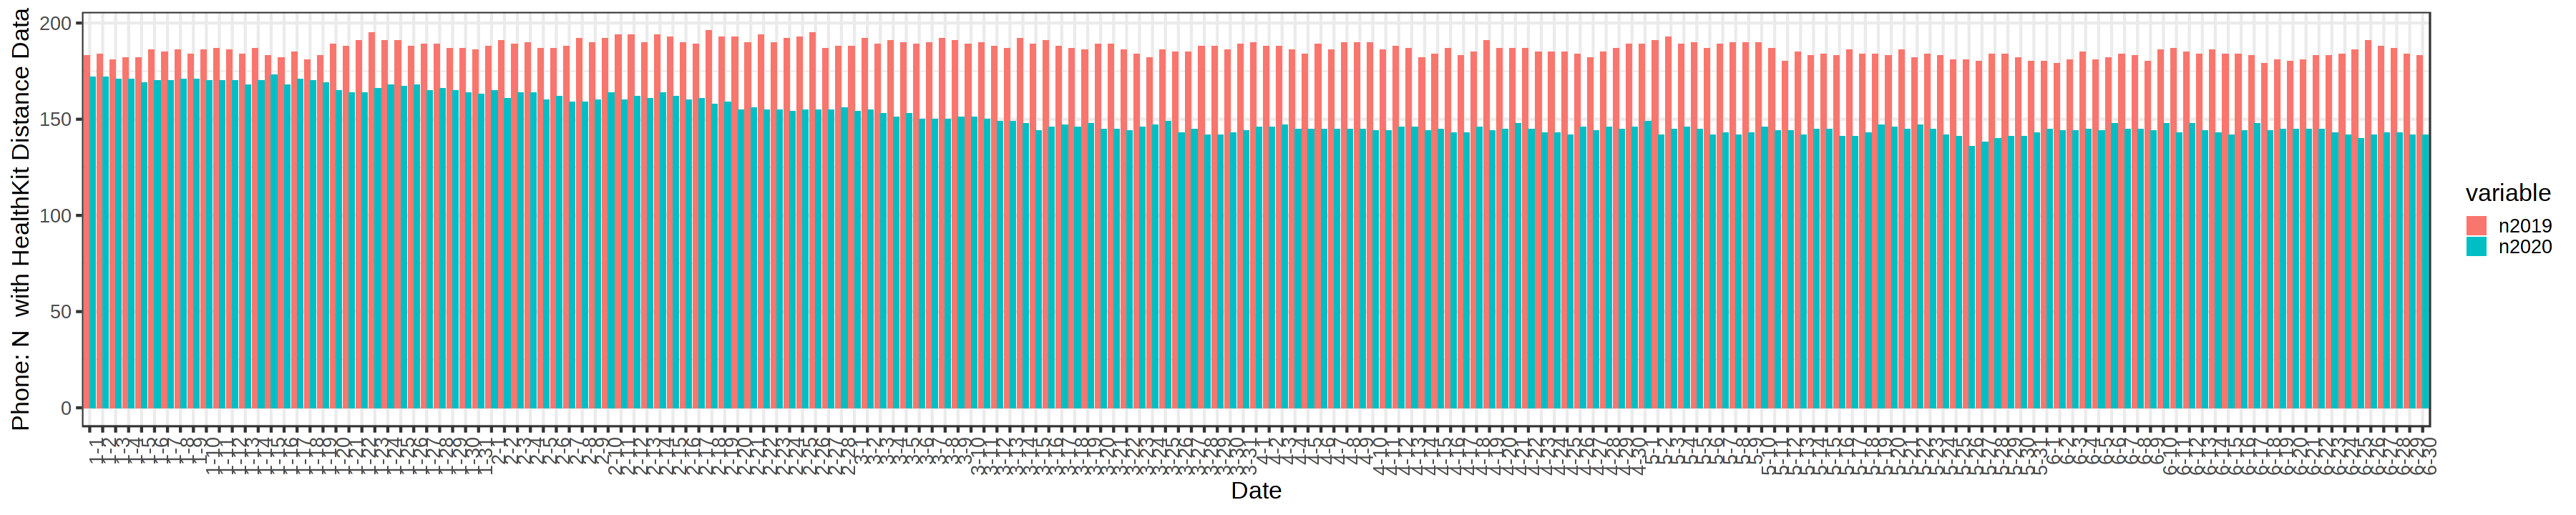

In [11]:
phone_subjects_distance_2019=phone_distance_2019 %>% group_by(Date) %>% summarize(n=n())
phone_subjects_distance_2020=phone_distance_2020 %>% group_by(Date) %>% summarize(n=n())
phone_subjects_distance_2020$Date=phone_subjects_distance_2020$Date-years(1)
phone_nmerged=merge(phone_subjects_distance_2019,phone_subjects_distance_2020,by='Date')
phone_nmerged$month=month(phone_nmerged$Date)
phone_nmerged$day=day(phone_nmerged$Date)

phone_nmerged$Date <- do.call(paste, c(phone_nmerged[c("month","day")], sep="-"))
colnames(phone_nmerged)=c("Date","n2019","n2020","month","day")
phone_nmerged$Date=factor(phone_nmerged$Date,levels=phone_nmerged$Date)
phone_nmerged$month=NULL
phone_nmerged$day=NULL


phone_nmelted=melt(phone_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(phone_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("Phone: N  with HealthKit Distance Data")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

## within subject 

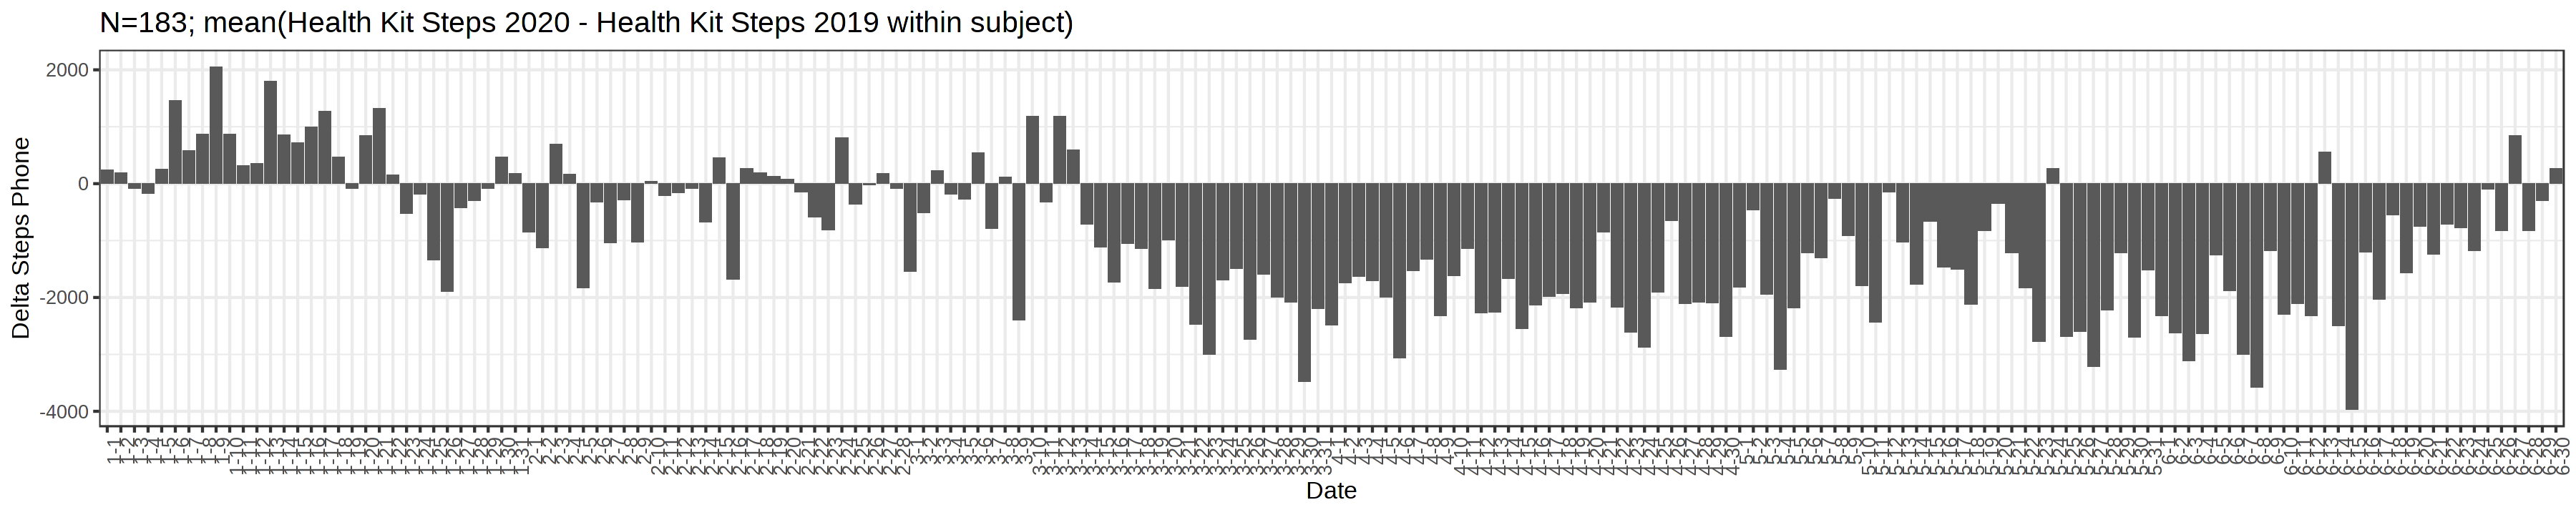

In [12]:
subject_means_2019=na.omit(phone_steps_2019 %>% group_by(Date,Subject) %>% summarize(mean_steps=mean(Value)))
subject_means_2020=na.omit(phone_steps_2020 %>% group_by(Date,Subject) %>% summarize(mean_steps=mean(Value)))
subject_means_2020$Date=subject_means_2020$Date-years(1)
subject_merged=merge(subject_means_2019,subject_means_2020,by=c("Subject","Date"))
subject_merged$month=month(subject_merged$Date)
subject_merged$day=day(subject_merged$Date)

subject_merged$Date <- do.call(paste, c(subject_merged[c("month","day")], sep="-"))
colnames(subject_merged)=c("Subject","Date","mean_2019","mean_2020","month","day")
#subject_merged$Date=factor(subject_merged$Date,levels=subject_merged$Date)
subject_merged$month=NULL
subject_merged$day=NULL
subject_merged$delta=subject_merged$mean_2020-subject_merged$mean_2019

subject_merged_means=subject_merged %>% group_by(Date) %>%summarize(mean_delta=mean(delta))
subject_merged_means$Date=factor(subject_merged_means$Date,levels=phone_nmerged$Date)
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(subject_merged_means,aes(x=Date,y=mean_delta))+
geom_bar(stat="identity")+
xlab("Date")+
ggtitle("N=183; mean(Health Kit Steps 2020 - Health Kit Steps 2019 within subject)")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ylab("Delta Steps Phone")

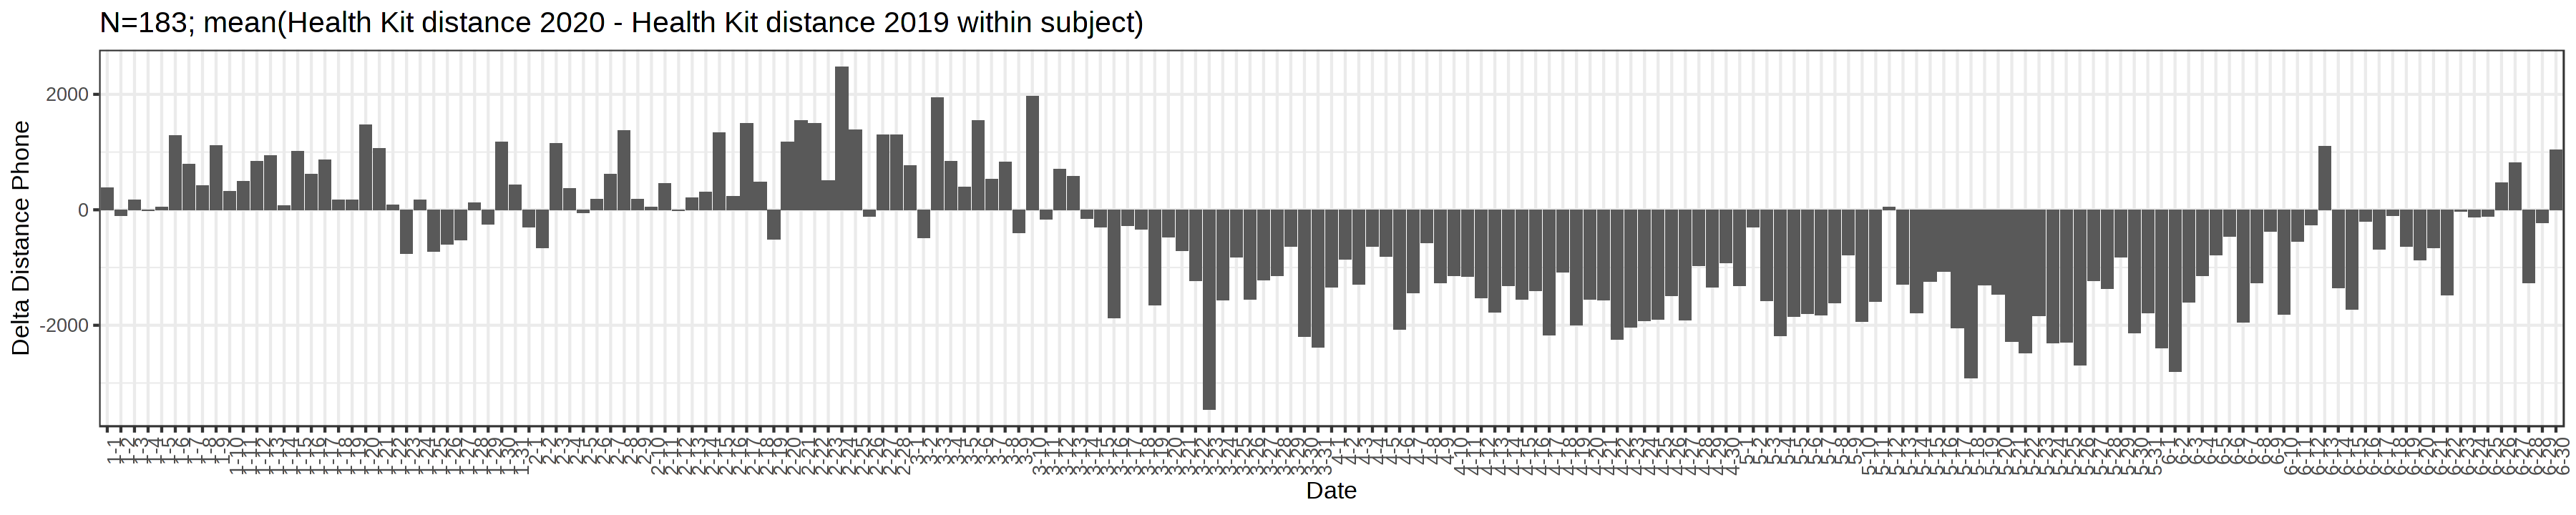

In [13]:
subject_means_2019=na.omit(phone_distance_2019 %>% group_by(Date,Subject) %>% summarize(mean_distance=mean(Value)))
subject_means_2020=na.omit(phone_distance_2020 %>% group_by(Date,Subject) %>% summarize(mean_distance=mean(Value)))
subject_means_2020$Date=subject_means_2020$Date-years(1)
subject_merged=merge(subject_means_2019,subject_means_2020,by=c("Subject","Date"))
subject_merged$month=month(subject_merged$Date)
subject_merged$day=day(subject_merged$Date)

subject_merged$Date <- do.call(paste, c(subject_merged[c("month","day")], sep="-"))
colnames(subject_merged)=c("Subject","Date","mean_2019","mean_2020","month","day")
#subject_merged$Date=factor(subject_merged$Date,levels=subject_merged$Date)
subject_merged$month=NULL
subject_merged$day=NULL
subject_merged$delta=subject_merged$mean_2020-subject_merged$mean_2019

subject_merged_means=subject_merged %>% group_by(Date) %>%summarize(mean_delta=mean(delta))
subject_merged_means$Date=factor(subject_merged_means$Date,levels=phone_nmerged$Date)
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(subject_merged_means,aes(x=Date,y=mean_delta))+
geom_bar(stat="identity")+
xlab("Date")+
ggtitle("N=183; mean(Health Kit distance 2020 - Health Kit distance 2019 within subject)")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ylab("Delta Distance Phone")

## across subjects

Using Date as id variables



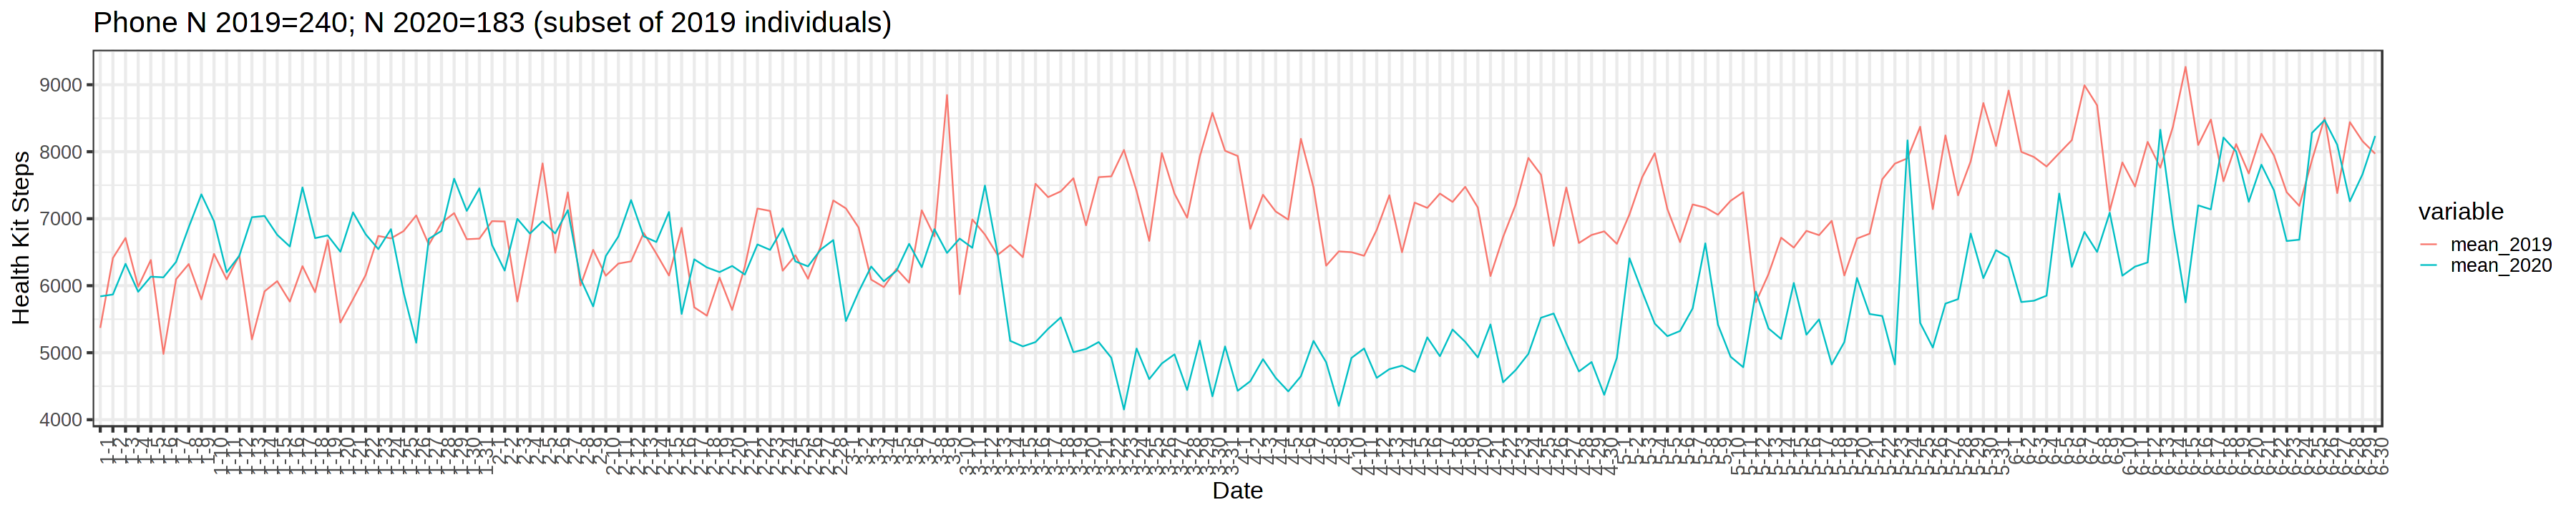

In [14]:
means_2019=na.omit(phone_steps_2019 %>% group_by(Date) %>% summarize(mean_steps=mean(Value)))
means_2020=na.omit(phone_steps_2020 %>% group_by(Date) %>% summarize(mean_steps=mean(Value)))

means_2020$Date=means_2020$Date-years(1)
merged=merge(means_2019,means_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)

merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","mean_2019","mean_2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)

merged$month=NULL
merged$day=NULL

melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("Health Kit Steps")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle("Phone N 2019=240; N 2020=183 (subset of 2019 individuals)")

Using Date as id variables



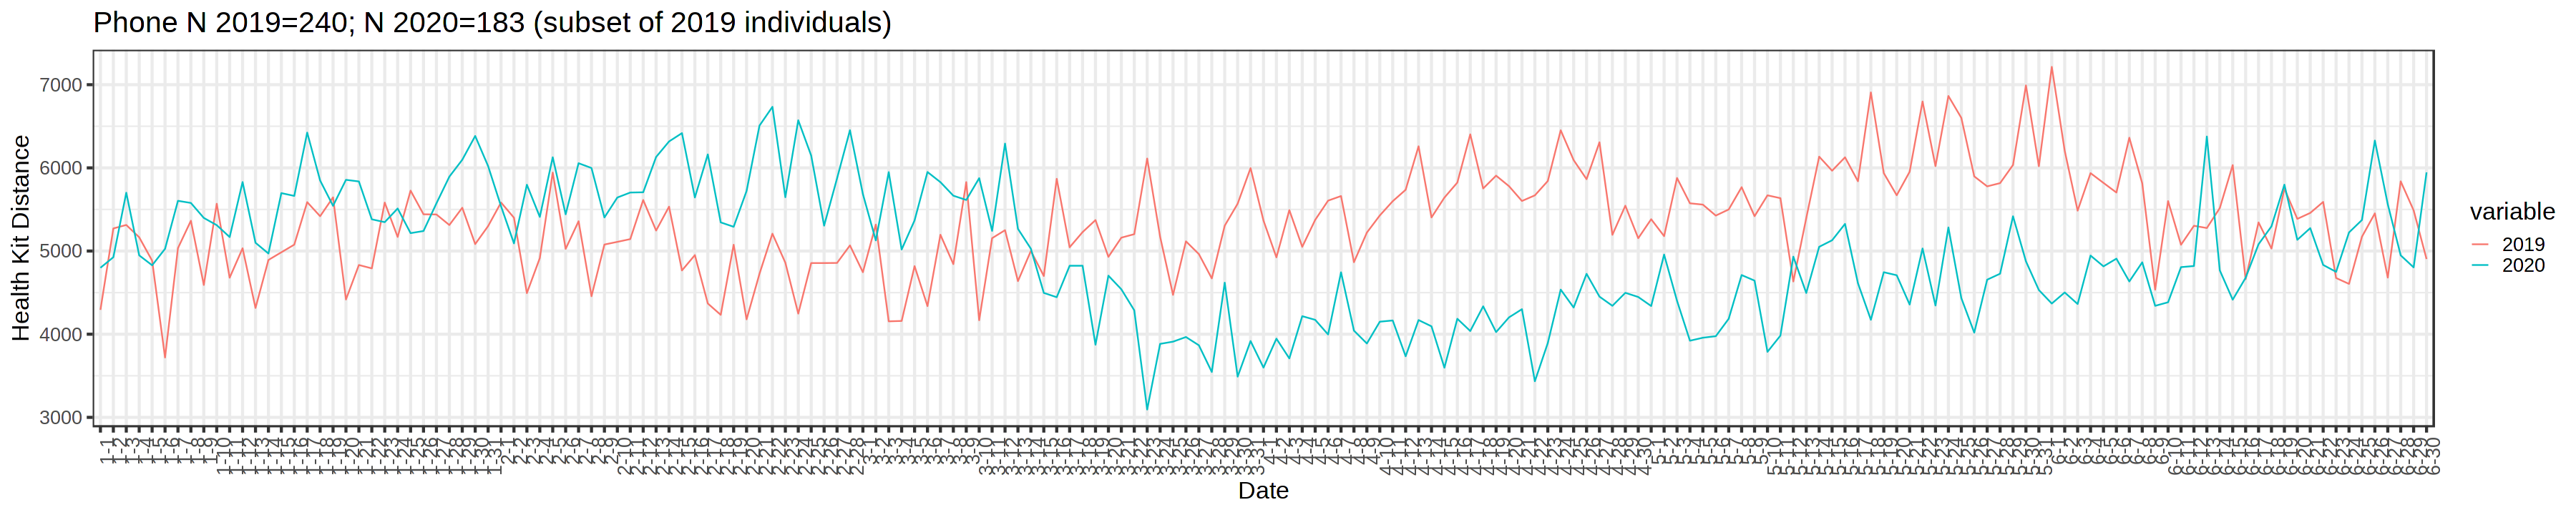

In [15]:
means_2019=na.omit(phone_distance_2019 %>% group_by(Date) %>% summarize(mean_distance=mean(Value)))
means_2020=na.omit(phone_distance_2020 %>% group_by(Date) %>% summarize(mean_distance=mean(Value)))
means_2020$Date=means_2020$Date-years(1)
merged=merge(means_2019,means_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)
merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","2019","2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)
merged$month=NULL
merged$day=NULL
melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("Health Kit Distance")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle("Phone N 2019=240; N 2020=183 (subset of 2019 individuals)")

## Watch 

In [16]:
watch_steps=read.table("parsed_HealthKitData.Steps.Watch.txt",header=TRUE,sep='\t')
watch_steps$Date=as.Date(watch_steps$Date)
length(unique(watch_steps$Subject))

[1] 997

In [17]:
watch_distance=read.table("parsed_HealthKitData.Distance.Watch.txt",header=TRUE,sep='\t')
watch_distance$Date=as.Date(watch_distance$Date)
length(unique(watch_distance$Subject))

[1] 1035

In [18]:
watch_steps_2019=watch_steps[(watch_steps$Date>=as.Date('2019-01-01')) & (watch_steps$Date<as.Date('2019-07-01')),]
watch_steps_2020=watch_steps[(watch_steps$Date>=as.Date('2020-01-01')) & (watch_steps$Date<as.Date('2020-07-01')),]
print(length(unique(watch_steps_2020$Subject)))
#filter to only people with 2019 data 
watch_steps_2020=watch_steps_2020[watch_steps_2020$Subject %in% watch_steps_2019$Subject,]
print(length(unique(watch_steps_2019$Subject)))
print(length(unique(watch_steps_2020$Subject)))





[1] 811
[1] 175
[1] 132


In [19]:
watch_distance_2019=watch_distance[(watch_distance$Date>=as.Date('2019-01-01')) & (watch_distance$Date<as.Date('2019-07-01')),]
watch_distance_2020=watch_distance[(watch_distance$Date>=as.Date('2020-01-01')) & (watch_distance$Date<as.Date('2020-07-01')),]
print(length(unique(watch_distance_2020$Subject)))

watch_distance_2020=watch_distance_2020[watch_distance_2020$Subject %in% watch_distance_2019$Subject,]
print(length(unique(watch_distance_2019$Subject)))
print(length(unique(watch_distance_2020$Subject)))



[1] 857
[1] 221
[1] 172


Using Date as id variables



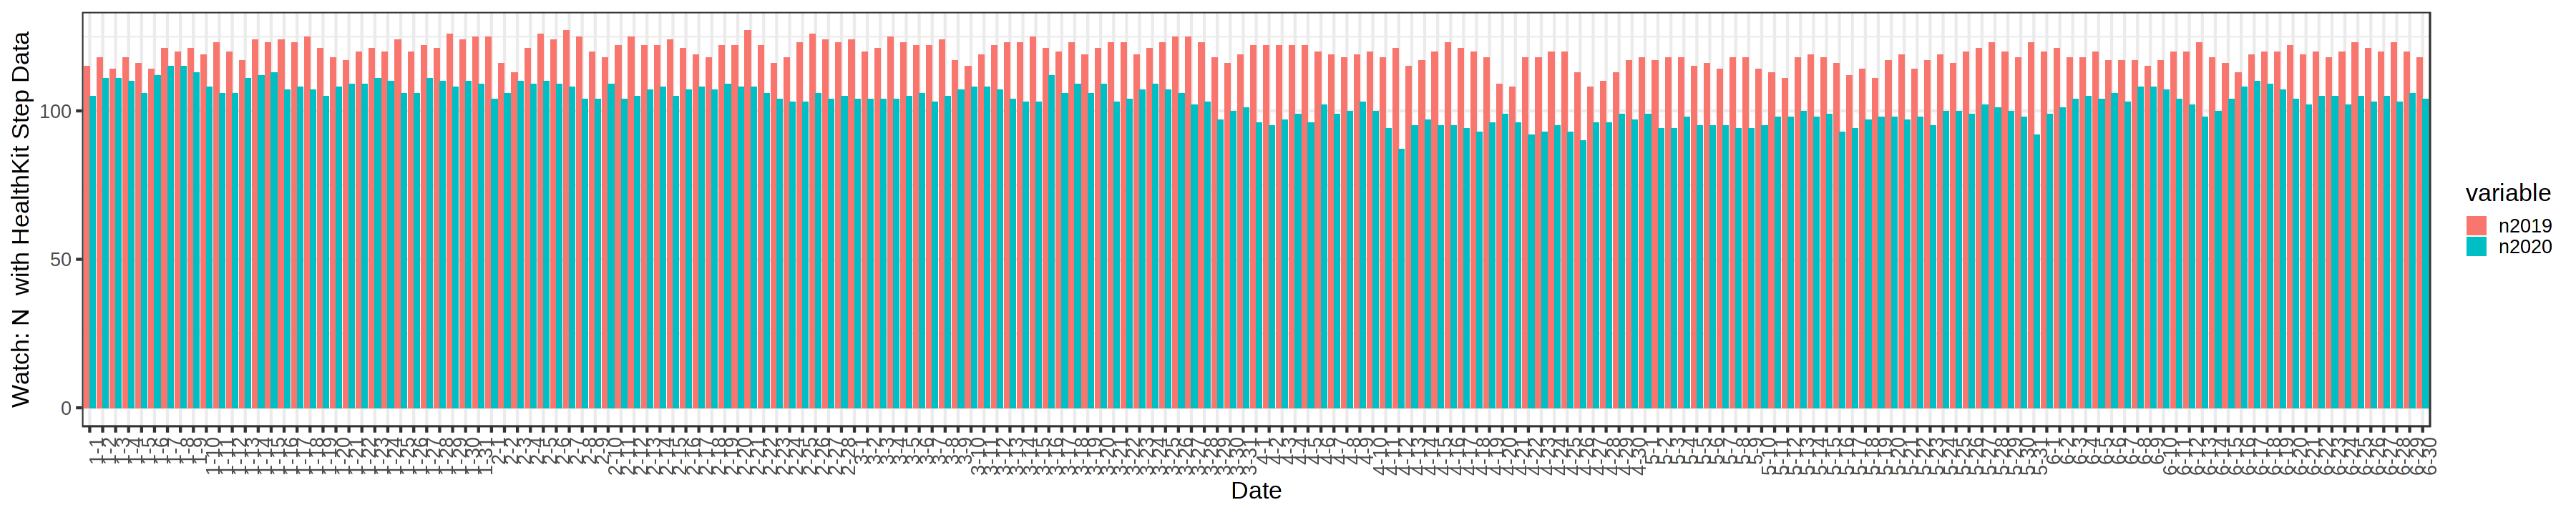

In [20]:
watch_subjects_steps_2019=watch_steps_2019 %>% group_by(Date) %>% summarize(n=n())
watch_subjects_steps_2020=watch_steps_2020 %>% group_by(Date) %>% summarize(n=n())
watch_subjects_steps_2020$Date=watch_subjects_steps_2020$Date-years(1)
watch_nmerged=merge(watch_subjects_steps_2019,watch_subjects_steps_2020,by='Date')
watch_nmerged$month=month(watch_nmerged$Date)
watch_nmerged$day=day(watch_nmerged$Date)

watch_nmerged$Date <- do.call(paste, c(watch_nmerged[c("month","day")], sep="-"))
colnames(watch_nmerged)=c("Date","n2019","n2020","month","day")
watch_nmerged$Date=factor(watch_nmerged$Date,levels=watch_nmerged$Date)
watch_nmerged$month=NULL
watch_nmerged$day=NULL


watch_nmelted=melt(watch_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(watch_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("Watch: N  with HealthKit Step Data")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

Using Date as id variables



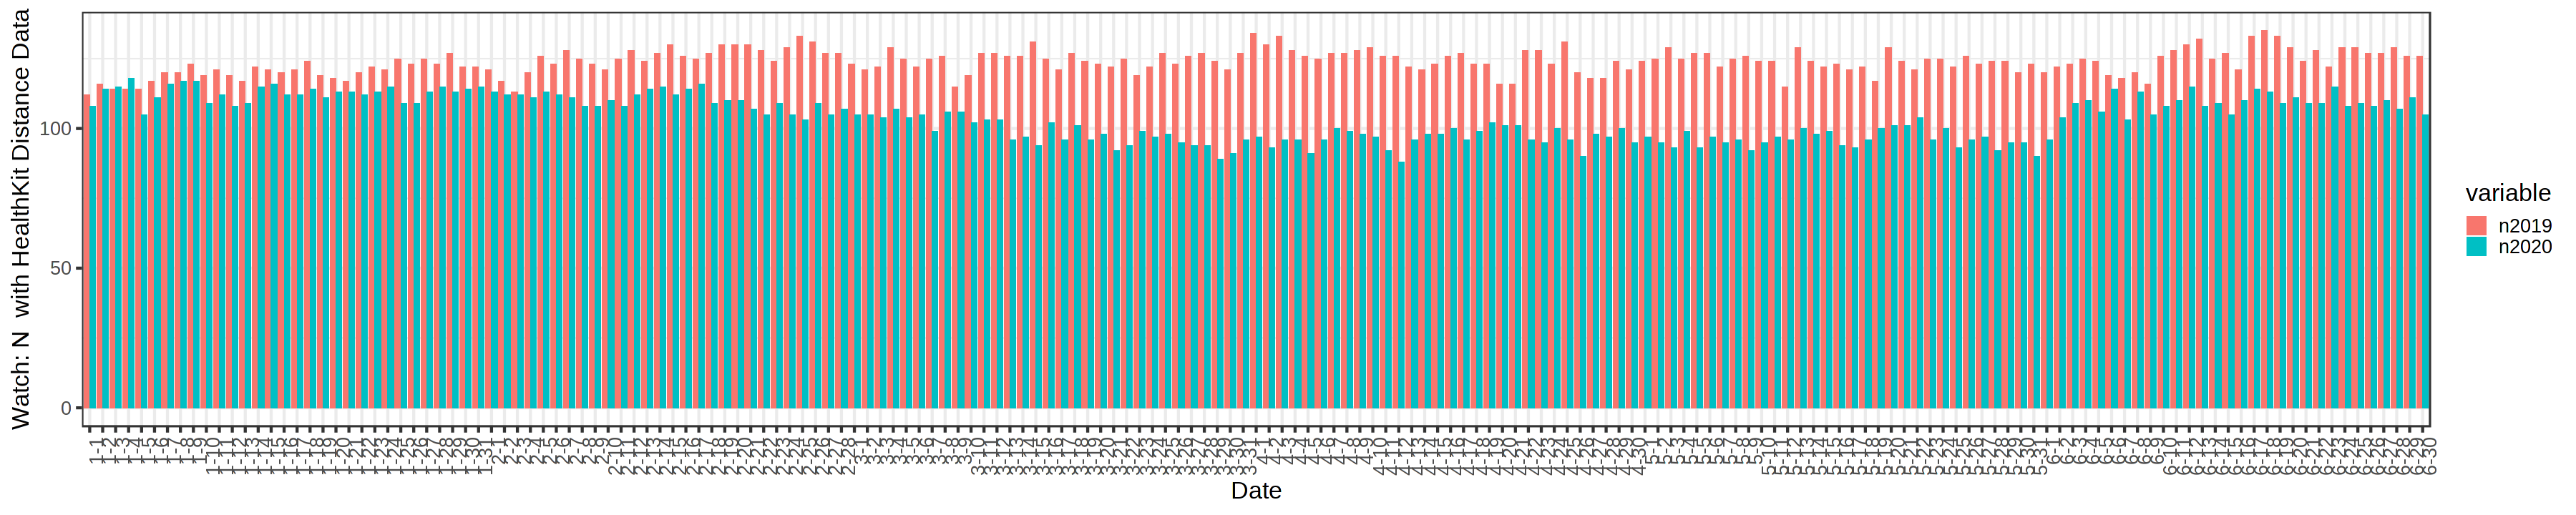

In [21]:
watch_subjects_distance_2019=watch_distance_2019 %>% group_by(Date) %>% summarize(n=n())
watch_subjects_distance_2020=watch_distance_2020 %>% group_by(Date) %>% summarize(n=n())
watch_subjects_distance_2020$Date=watch_subjects_distance_2020$Date-years(1)
watch_nmerged=merge(watch_subjects_distance_2019,watch_subjects_distance_2020,by='Date')
watch_nmerged$month=month(watch_nmerged$Date)
watch_nmerged$day=day(watch_nmerged$Date)

watch_nmerged$Date <- do.call(paste, c(watch_nmerged[c("month","day")], sep="-"))
colnames(watch_nmerged)=c("Date","n2019","n2020","month","day")
watch_nmerged$Date=factor(watch_nmerged$Date,levels=watch_nmerged$Date)
watch_nmerged$month=NULL
watch_nmerged$day=NULL


watch_nmelted=melt(watch_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(watch_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("Watch: N  with HealthKit Distance Data")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

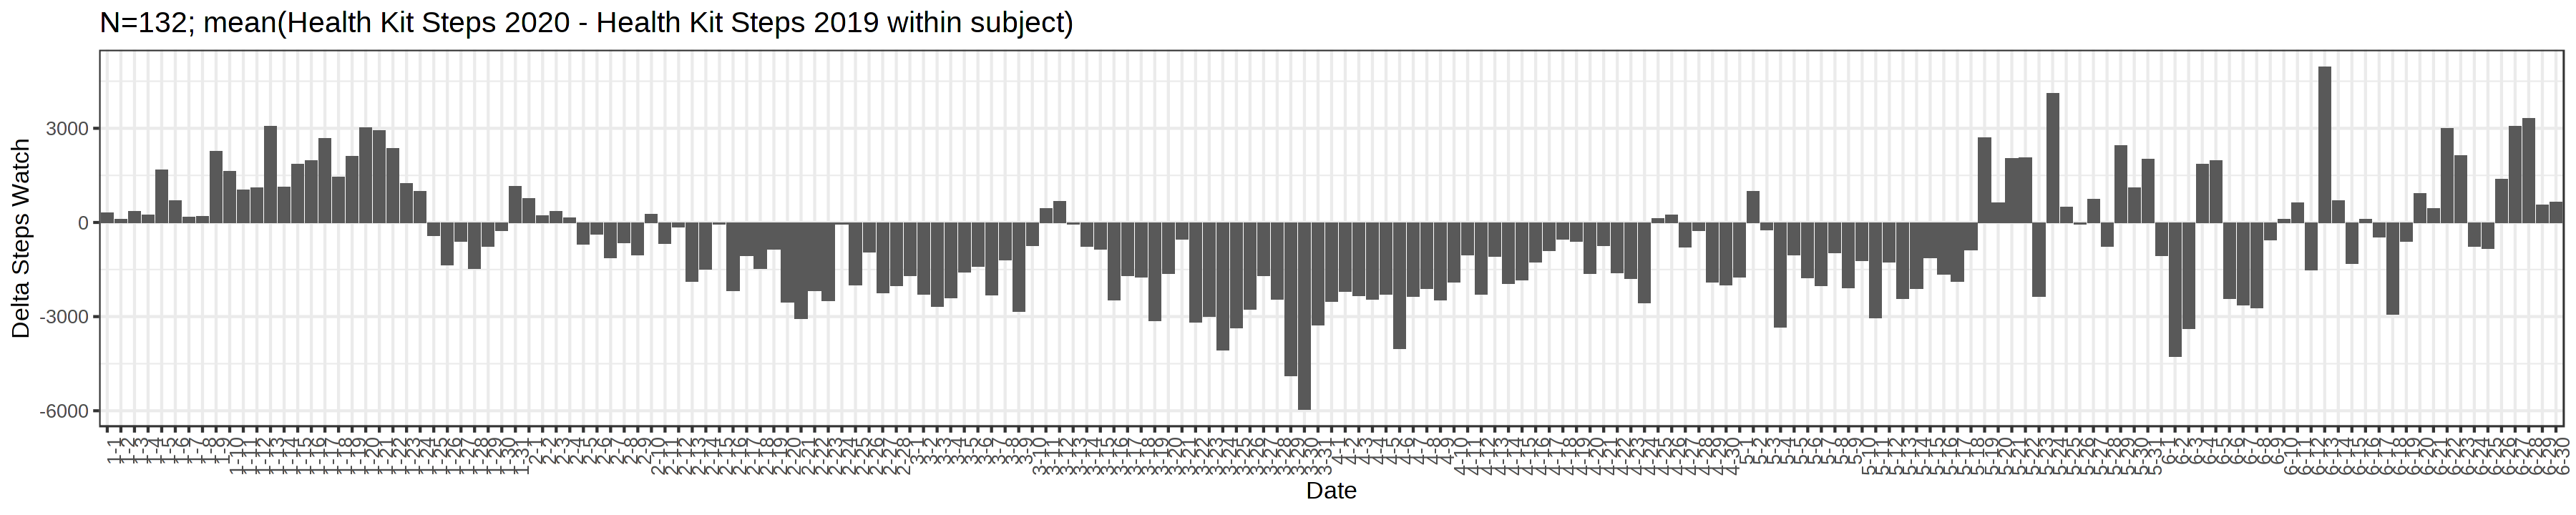

In [22]:
subject_means_2019=na.omit(watch_steps_2019 %>% group_by(Date,Subject) %>% summarize(mean_steps=mean(Value)))
subject_means_2020=na.omit(watch_steps_2020 %>% group_by(Date,Subject) %>% summarize(mean_steps=mean(Value)))
subject_means_2020$Date=subject_means_2020$Date-years(1)
subject_merged=merge(subject_means_2019,subject_means_2020,by=c("Subject","Date"))
subject_merged$month=month(subject_merged$Date)
subject_merged$day=day(subject_merged$Date)

subject_merged$Date <- do.call(paste, c(subject_merged[c("month","day")], sep="-"))
colnames(subject_merged)=c("Subject","Date","mean_2019","mean_2020","month","day")
#subject_merged$Date=factor(subject_merged$Date,levels=subject_merged$Date)
subject_merged$month=NULL
subject_merged$day=NULL
subject_merged$delta=subject_merged$mean_2020-subject_merged$mean_2019

subject_merged_means=subject_merged %>% group_by(Date) %>%summarize(mean_delta=mean(delta))
subject_merged_means$Date=factor(subject_merged_means$Date,levels=watch_nmerged$Date)
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(subject_merged_means,aes(x=Date,y=mean_delta))+
geom_bar(stat="identity")+
xlab("Date")+
ggtitle("N=132; mean(Health Kit Steps 2020 - Health Kit Steps 2019 within subject)")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ylab("Delta Steps Watch")

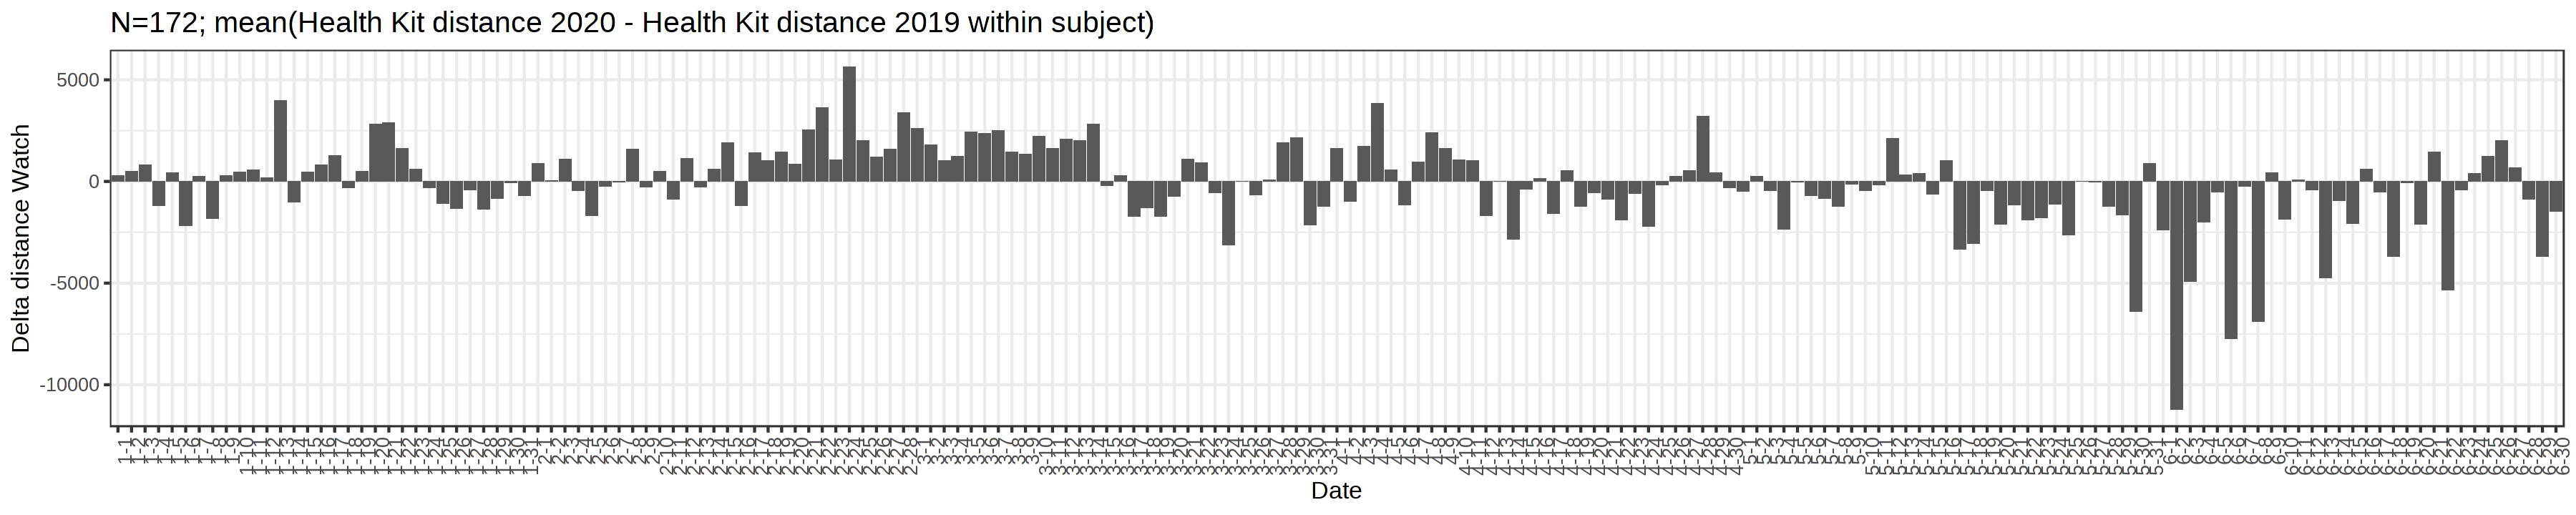

In [23]:
subject_means_2019=na.omit(watch_distance_2019 %>% group_by(Date,Subject) %>% summarize(mean_distance=mean(Value)))
subject_means_2020=na.omit(watch_distance_2020 %>% group_by(Date,Subject) %>% summarize(mean_distance=mean(Value)))
subject_means_2020$Date=subject_means_2020$Date-years(1)
subject_merged=merge(subject_means_2019,subject_means_2020,by=c("Subject","Date"))
subject_merged$month=month(subject_merged$Date)
subject_merged$day=day(subject_merged$Date)

subject_merged$Date <- do.call(paste, c(subject_merged[c("month","day")], sep="-"))
colnames(subject_merged)=c("Subject","Date","mean_2019","mean_2020","month","day")
#subject_merged$Date=factor(subject_merged$Date,levels=subject_merged$Date)
subject_merged$month=NULL
subject_merged$day=NULL
subject_merged$delta=subject_merged$mean_2020-subject_merged$mean_2019

subject_merged_means=subject_merged %>% group_by(Date) %>%summarize(mean_delta=mean(delta))
subject_merged_means$Date=factor(subject_merged_means$Date,levels=watch_nmerged$Date)
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(subject_merged_means,aes(x=Date,y=mean_delta))+
geom_bar(stat="identity")+
xlab("Date")+
ggtitle("N=172; mean(Health Kit distance 2020 - Health Kit distance 2019 within subject)")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ylab("Delta distance Watch")

Using Date as id variables



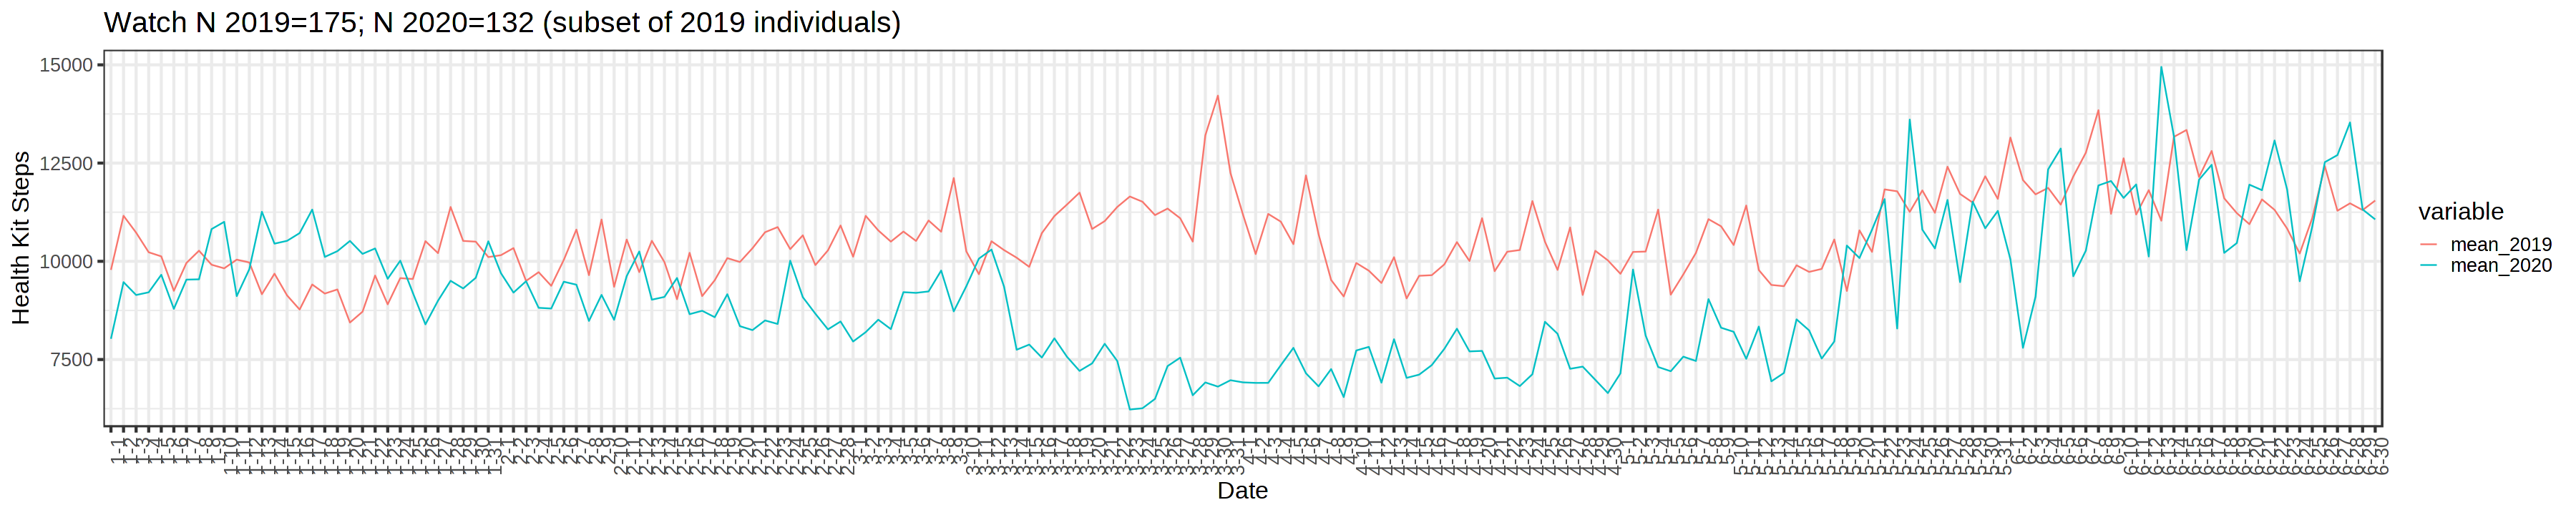

In [24]:
means_2019=na.omit(watch_steps_2019 %>% group_by(Date) %>% summarize(mean_steps=mean(Value)))
means_2020=na.omit(watch_steps_2020 %>% group_by(Date) %>% summarize(mean_steps=mean(Value)))

means_2020$Date=means_2020$Date-years(1)
merged=merge(means_2019,means_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)

merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","mean_2019","mean_2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)

merged$month=NULL
merged$day=NULL

melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("Health Kit Steps")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle("Watch N 2019=175; N 2020=132 (subset of 2019 individuals)")

Using Date as id variables



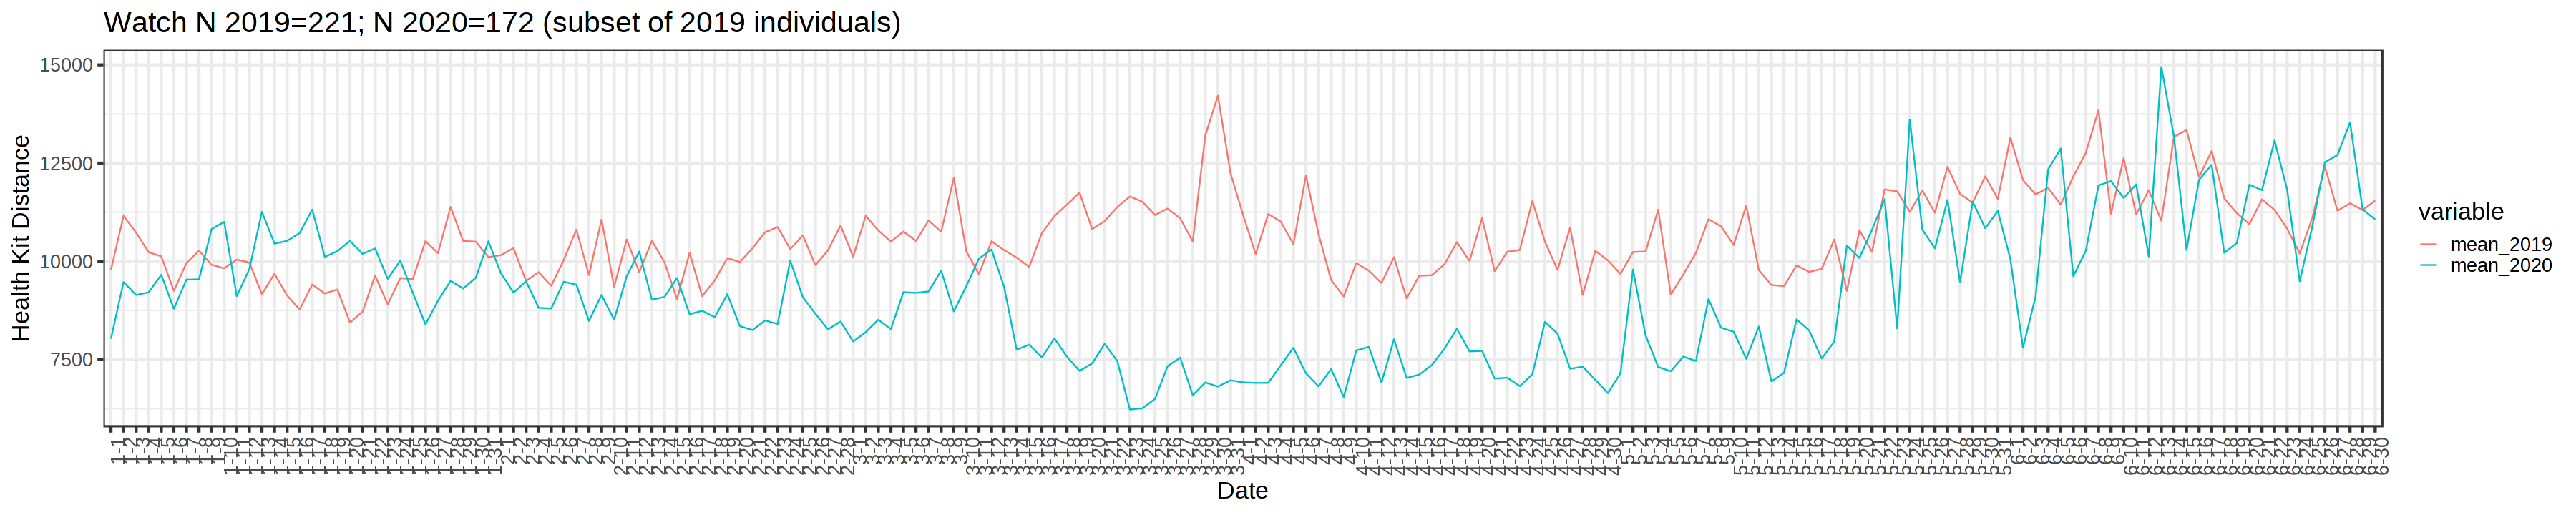

In [25]:
means_2019=na.omit(watch_steps_2019 %>% group_by(Date) %>% summarize(mean_steps=mean(Value)))
means_2020=na.omit(watch_steps_2020 %>% group_by(Date) %>% summarize(mean_steps=mean(Value)))

means_2020$Date=means_2020$Date-years(1)
merged=merge(means_2019,means_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)

merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","mean_2019","mean_2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)

merged$month=NULL
merged$day=NULL

melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("Health Kit Distance")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle("Watch N 2019=221; N 2020=172 (subset of 2019 individuals)")

## Sleep 

In [26]:
sleep=read.table("parsed_HealthKitSleep.txt",header=TRUE,sep='\t')
#remove any non-possible values 
sleep=sleep[sleep$Value<57600,] #14 hours of sleep

In [27]:
head(sleep)

,Subject,Date,WeekDay,Metric,Value,Source,SourceBlobs
,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>
1,04ee62df-475b-477b-ad74-5a206d8a1946,2020-05-31,6,HKCategoryValueSleepAnalysisAsleep,45900,"(Misfit, com.misfitwearables.Prometheus)","54157014,54707938"
10,04ee62df-475b-477b-ad74-5a206d8a1946,1969-12-31,2,HKCategoryValueSleepAnalysisAsleep,0,"(Misfit, com.misfitwearables.Prometheus)","54312921,54373720,54408450,54442032,54486593,54615630,54707938,54820308,56631291,56780648,57328536,59942143,60031211,61760042,61811765,62478170,62482580"
13,04ee62df-475b-477b-ad74-5a206d8a1946,2020-06-06,5,HKCategoryValueSleepAnalysisInBed,49792,"(iPhone 7, com.apple.mobiletimer)","54312921,54707938"
14,04ee62df-475b-477b-ad74-5a206d8a1946,2020-06-07,6,HKCategoryValueSleepAnalysisInBed,49248,"(iPhone 7, com.apple.mobiletimer)","54312921,54707938"
20,04ee62df-475b-477b-ad74-5a206d8a1946,2020-06-10,2,HKCategoryValueSleepAnalysisAsleep,26160,"(Misfit, com.misfitwearables.Prometheus)","54408450,54707938"
29,04ee62df-475b-477b-ad74-5a206d8a1946,2020-06-15,0,HKCategoryValueSleepAnalysisAsleep,14704,"(Misfit, com.misfitwearables.Prometheus)",54707938


In [28]:
sleep$Date=as.Date(sleep$Date)
length(unique(sleep$Subject))

[1] 593

In [29]:
sleep_2019=sleep[(sleep$Date>=as.Date('2019-01-01')) & (sleep$Date<as.Date('2019-07-01')),]
sleep_2020=sleep[(sleep$Date>=as.Date('2020-01-01')) & (sleep$Date<as.Date('2020-07-01')),]
print(length(unique(sleep_2020$Subject)))
#filter to only people with 2019 data 
sleep_2020=sleep_2020[sleep_2020$Subject %in% sleep_2019$Subject,]
print(length(unique(sleep_2020$Subject)))
print(length(unique(sleep_2020$Subject)))



[1] 535
[1] 163
[1] 163


In [30]:
asleep_2019=sleep_2019[sleep_2019$Metric=="HKCategoryValueSleepAnalysisAsleep",]
asleep_2020=sleep_2020[sleep_2019$Metric=="HKCategoryValueSleepAnalysisAsleep",]


inbed_2019=sleep_2019[sleep_2019$Metric=="HKCategoryValueSleepAnalysisInBed",]
inbed_2020=sleep_2020[sleep_2019$Metric=="HKCategoryValueSleepAnalysisInBed",]


In [31]:
asleep_2019

,Subject,Date,WeekDay,Metric,Value,Source,SourceBlobs
,<fct>,<date>,<int>,<fct>,<dbl>,<fct>,<fct>
178,04ee62df-475b-477b-ad74-5a206d8a1946,2019-01-28,0,HKCategoryValueSleepAnalysisAsleep,25376,"(Misfit, com.misfitwearables.Prometheus)",54707938
180,04ee62df-475b-477b-ad74-5a206d8a1946,2019-01-29,1,HKCategoryValueSleepAnalysisAsleep,28016,"(Misfit, com.misfitwearables.Prometheus)",54707938
182,04ee62df-475b-477b-ad74-5a206d8a1946,2019-01-30,2,HKCategoryValueSleepAnalysisAsleep,4920,"(Misfit, com.misfitwearables.Prometheus)",54707938
185,04ee62df-475b-477b-ad74-5a206d8a1946,2019-02-03,6,HKCategoryValueSleepAnalysisAsleep,19264,"(Misfit, com.misfitwearables.Prometheus)",54707938
187,04ee62df-475b-477b-ad74-5a206d8a1946,2019-02-04,0,HKCategoryValueSleepAnalysisAsleep,26336,"(Misfit, com.misfitwearables.Prometheus)",54707938
197,04ee62df-475b-477b-ad74-5a206d8a1946,2019-05-25,5,HKCategoryValueSleepAnalysisAsleep,28972,"(Misfit, com.misfitwearables.Prometheus)",54707938
198,04ee62df-475b-477b-ad74-5a206d8a1946,2019-05-26,6,HKCategoryValueSleepAnalysisAsleep,25560,"(Misfit, com.misfitwearables.Prometheus)",54707938
200,04ee62df-475b-477b-ad74-5a206d8a1946,2019-05-28,1,HKCategoryValueSleepAnalysisAsleep,25312,"(Misfit, com.misfitwearables.Prometheus)",54707938
201,04ee62df-475b-477b-ad74-5a206d8a1946,2019-05-29,2,HKCategoryValueSleepAnalysisAsleep,14040,"(Misfit, com.misfitwearables.Prometheus)",54707938


In [70]:
sleep_sources_2019=as.data.frame(t(table(asleep_2019$Source)))
sleep_sources_2019=sleep_sources_2019[sleep_sources_2019$Freq>0,]
sleep_sources_2019$Var1=NULL
colnames(sleep_sources_2019)=c("Source","SubjectDays2019")
sleep_sources_2019=sleep_sources_2019[order(-sleep_sources_2019$SubjectDays),]
sleep_sources_2020=as.data.frame(t(table(asleep_2020$Source)))
sleep_sources_2020=sleep_sources_2020[sleep_sources_2020$Freq>0,]
sleep_sources_2020$Var1=NULL
colnames(sleep_sources_2020)=c("Source","SubjectDays2020")
sleep_sources_2020=sleep_sources_2020[order(-sleep_sources_2020$SubjectDays),]
library(plyr)
sleep_sources_merged=join(sleep_sources_2019,sleep_sources_2020,by=c("Source"),type='full')

In [71]:
sleep_sources_merged

Source,SubjectDays2019,SubjectDays2020
<fct>,<int>,<int>
"(AutoSleep, com.tantsissa.AutoSleep)",6833,4190
"(SleepWatch, io.bodymatter.SleepWatch)",3254,2904
"(Sleep++, com.developingperspective.SleepPlusPlus)",2046,889
"(Sleep Cycle, com.lexwarelabs.goodmorning)",1905,1286
"(Pillow, com.neybox.Pillow)",1084,880
"(Connect, com.garmin.connect.mobile)",806,493
"(Health Mate, com.withings.wiScaleNG)",747,600
"(Motiv, com.mymotiv.motiv)",386,358
"(Oura, com.ouraring.oura)",318,679


Using Date as id variables



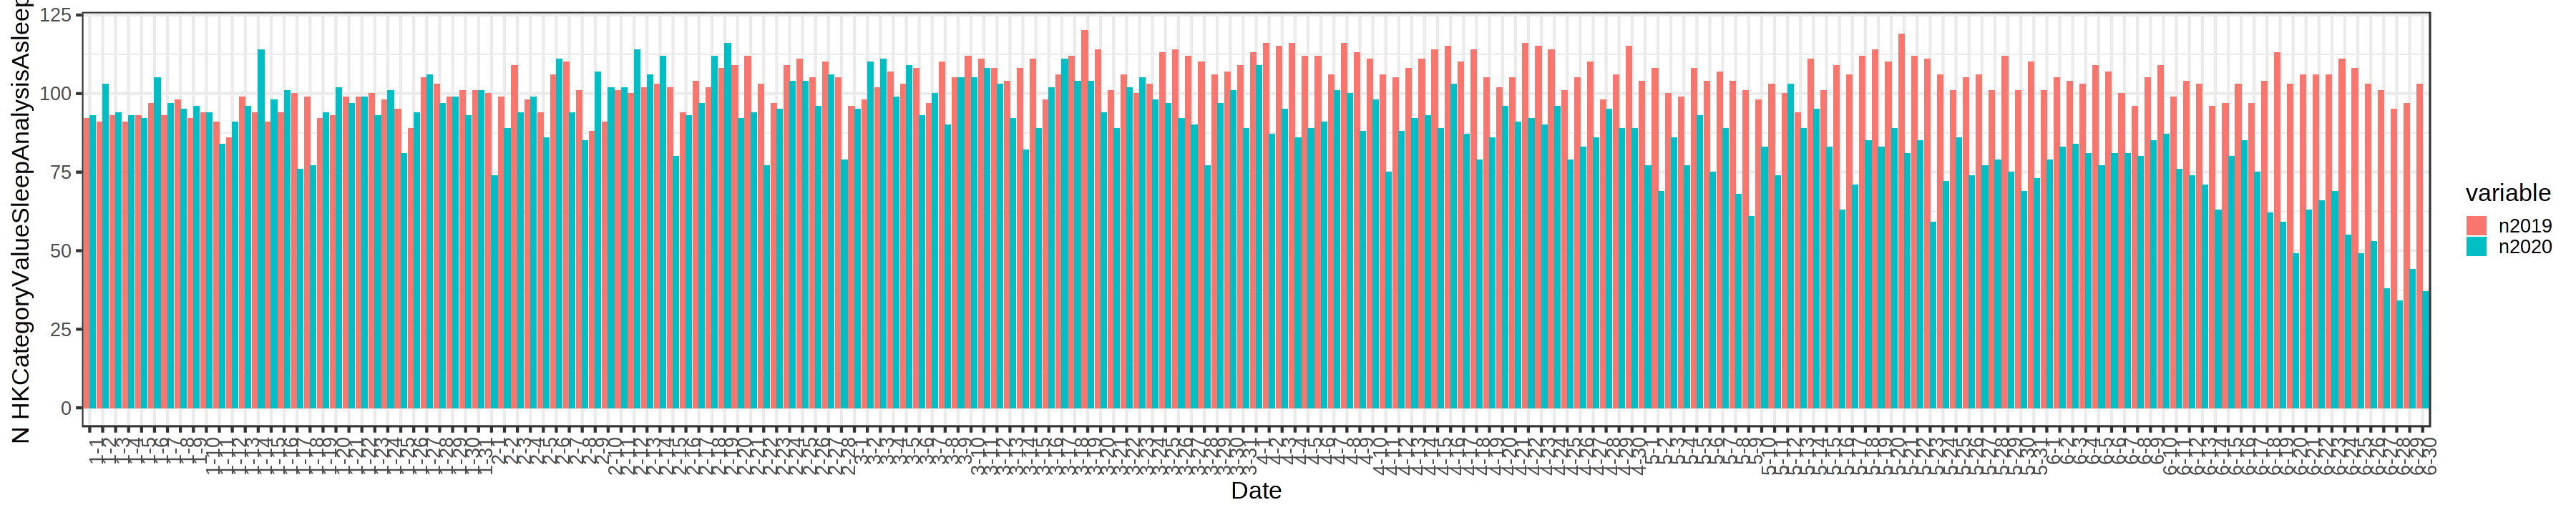

In [32]:
n_asleep_2019=asleep_2019 %>% group_by(Date) %>% summarize(n=n())
n_asleep_2020=asleep_2020 %>% group_by(Date) %>% summarize(n=n())
n_asleep_2020$Date=n_asleep_2020$Date-years(1)
asleep_nmerged=merge(n_asleep_2019,n_asleep_2020,by='Date')
asleep_nmerged$month=month(asleep_nmerged$Date)
asleep_nmerged$day=day(asleep_nmerged$Date)

asleep_nmerged$Date <- do.call(paste, c(asleep_nmerged[c("month","day")], sep="-"))
colnames(asleep_nmerged)=c("Date","n2019","n2020","month","day")
asleep_nmerged$Date=factor(asleep_nmerged$Date,levels=asleep_nmerged$Date)
asleep_nmerged$month=NULL
asleep_nmerged$day=NULL


asleep_nmelted=melt(asleep_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(asleep_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("N HKCategoryValueSleepAnalysisAsleep")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

Using Date as id variables



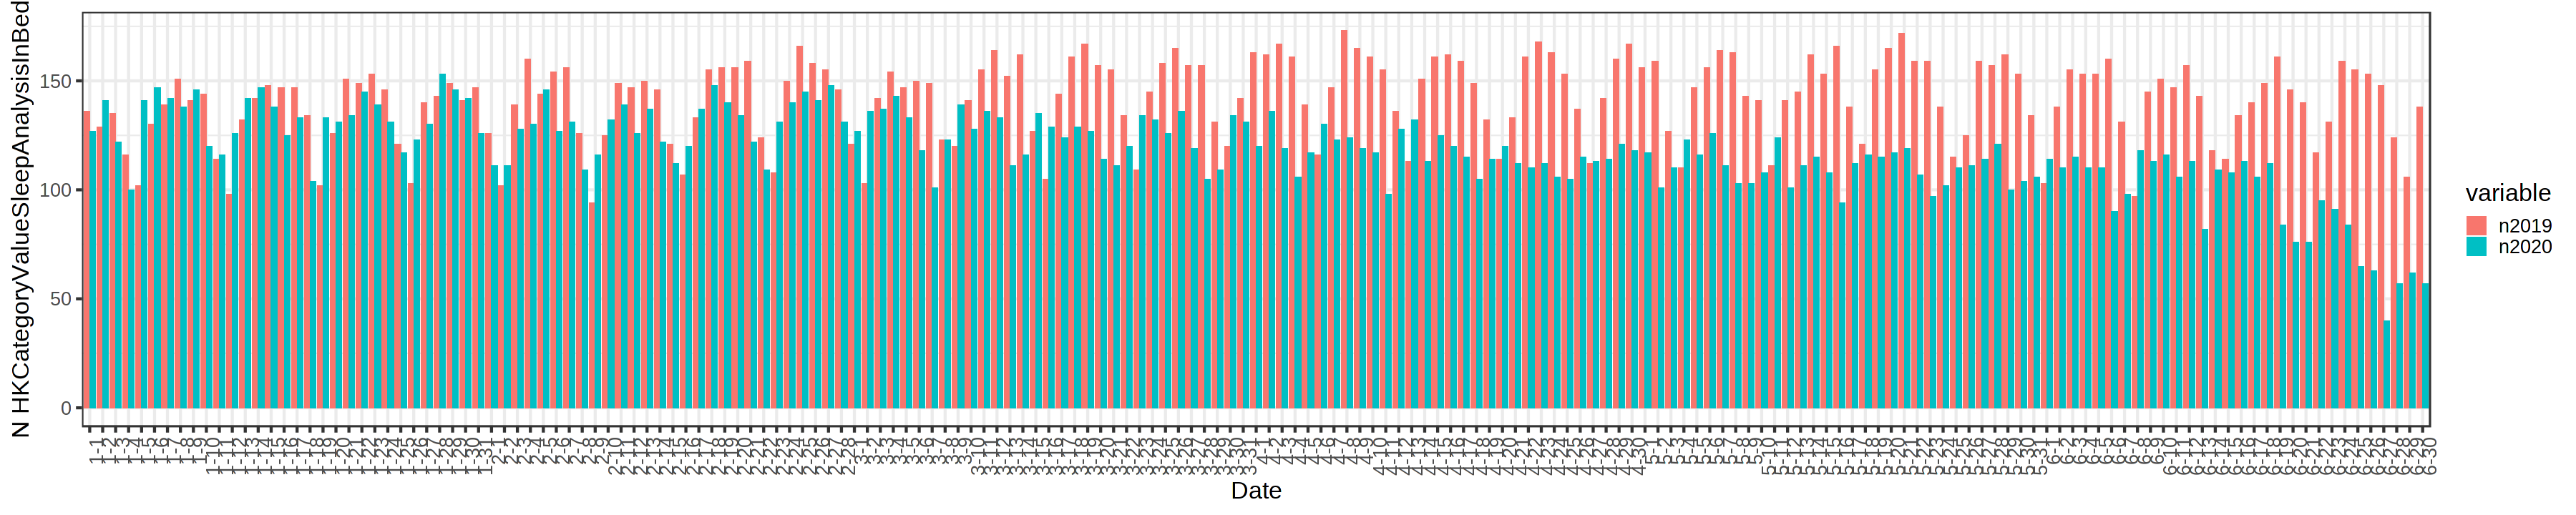

In [33]:
n_inbed_2019=inbed_2019 %>% group_by(Date) %>% summarize(n=n())
n_inbed_2020=inbed_2020 %>% group_by(Date) %>% summarize(n=n())
n_inbed_2020$Date=n_inbed_2020$Date-years(1)
inbed_nmerged=merge(n_inbed_2019,n_inbed_2020,by='Date')
inbed_nmerged$month=month(inbed_nmerged$Date)
inbed_nmerged$day=day(inbed_nmerged$Date)

inbed_nmerged$Date <- do.call(paste, c(inbed_nmerged[c("month","day")], sep="-"))
colnames(inbed_nmerged)=c("Date","n2019","n2020","month","day")
inbed_nmerged$Date=factor(inbed_nmerged$Date,levels=inbed_nmerged$Date)
inbed_nmerged$month=NULL
inbed_nmerged$day=NULL


inbed_nmelted=melt(inbed_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(inbed_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("N HKCategoryValueSleepAnalysisInBed")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

Using Date as id variables



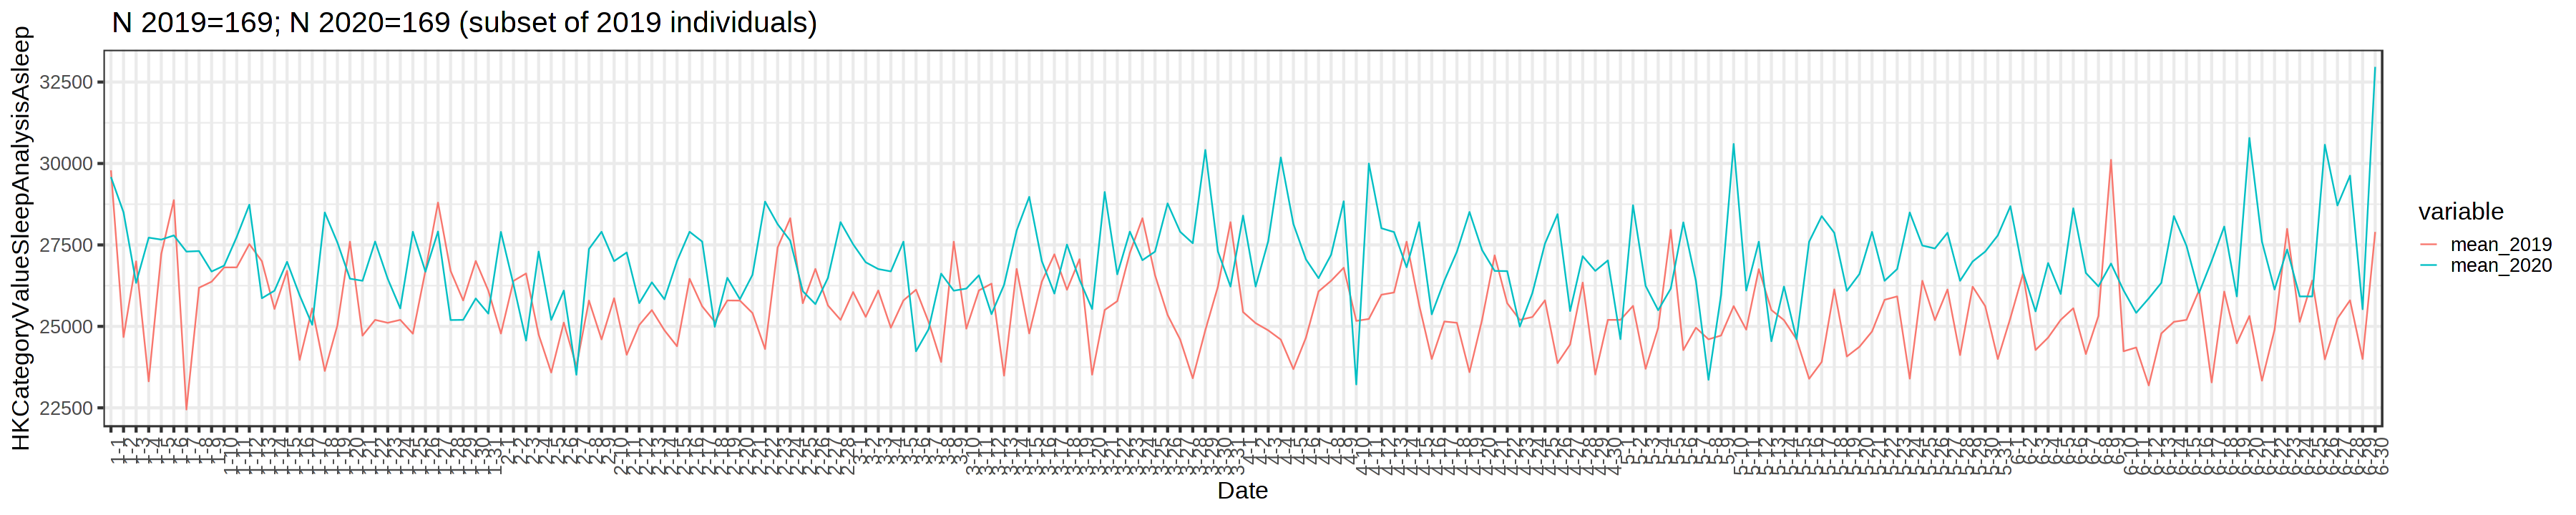

In [37]:
means_2019=na.omit(asleep_2019 %>% group_by(Date) %>% summarize(mean_steps=median(Value)))
means_2020=na.omit(asleep_2020 %>% group_by(Date) %>% summarize(mean_steps=median(Value)))

means_2020$Date=means_2020$Date-years(1)
#uncomment to match weekdays/weekends 
#means_2020$Date=means_2020$Date-days(1)
merged=merge(means_2019,means_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)

merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","mean_2019","mean_2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)

merged$month=NULL
merged$day=NULL

melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("HKCategoryValueSleepAnalysisAsleep")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle(" N 2019=169; N 2020=169 (subset of 2019 individuals)")

Using Date as id variables



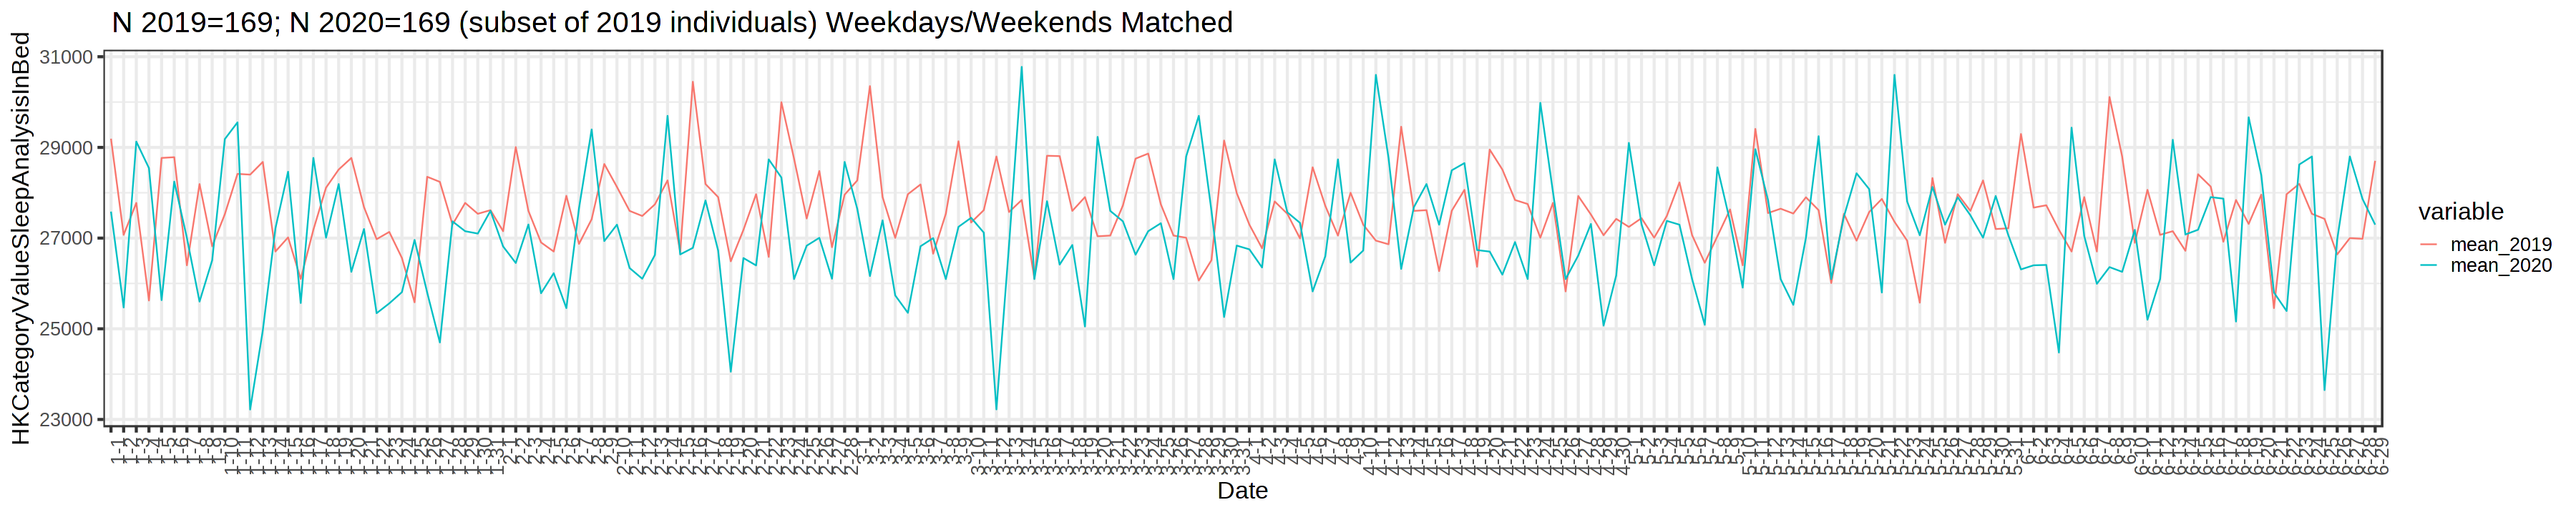

In [35]:
means_2019=na.omit(inbed_2019 %>% group_by(Date) %>% summarize(mean_steps=median(Value)))
means_2020=na.omit(inbed_2020 %>% group_by(Date) %>% summarize(mean_steps=median(Value)))

means_2020$Date=means_2020$Date-years(1)
#uncomment to match weekdays/weekends 
means_2020$Date=means_2020$Date-days(1)
merged=merge(means_2019,means_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)

merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","mean_2019","mean_2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)

merged$month=NULL
merged$day=NULL

melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("HKCategoryValueSleepAnalysisInBed")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle(" N 2019=169; N 2020=169 (subset of 2019 individuals) Weekdays/Weekends Matched")